<a href="https://colab.research.google.com/github/vishalrk1/tensorflow_Pytorch/blob/main/pytorch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
# sigmoid activation function
def activation(x):
  '''
  Sigmoid Activation Function
  '''
  return 1/(1+torch.exp(-x))

In [3]:
torch.manual_seed(7)

# 5 normal random feature variables
features = torch.randn((1, 5))

# weights
weights = torch.randn_like(features)

# true bias term
bias = torch.randn((1, 1))

In [4]:
weights

tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])

In [5]:
weights.view((5, 1)).shape, weights.shape

(torch.Size([5, 1]), torch.Size([1, 5]))

In [6]:
# matrix multiplication of features and weights
# Z = W*X + B ---> then pass it through activation function
# feature shape --> (1, 5)
# weights shape --> (5, 1)

Z = torch.mm(features, weights.view(5, 1)) + bias
y = activation(Z)

In [7]:
torch.manual_seed(7)

# random features
features = torch.randn((1, 3))

# Defining size of each layer in network
n_input = features.shape[1]
n_hidden = 2
n_output = 1

# weights for input --> hidden layer
W1 = torch.randn((n_input, n_hidden))

# weights for hidden --> output
W2 = torch.randn((n_hidden, n_output))

# biase terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [8]:
y1 = activation(torch.mm(features, W1) + B1)
output = activation(torch.mm(y1, W2) + B2)
output

tensor([[0.3171]])

# Neural Networks in pytorch
## MNIST Dataset

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [10]:
from torchvision import datasets, transforms

In [11]:
# defining transformer to normalize dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.5,),
        (0.5,),
    ),
])

# Downloading and loading training data
train_data = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [13]:
images.view(images.shape[0], -1).shape

torch.Size([64, 784])

In [14]:
def softmax(x):
  return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [15]:
# flattening the input image
inputs = images.view(images.shape[0], -1)

# creating parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

output = softmax(torch.mm(h, w2) + b2)

In [16]:
output.shape

torch.Size([64, 10])

In [17]:
output

tensor([[1.5826e-08, 3.0469e-10, 1.1890e-09, 1.6261e-05, 1.7173e-09, 8.6754e-01,
         1.9488e-08, 1.3243e-01, 8.3684e-06, 1.4465e-14],
        [1.5969e-05, 1.8337e-08, 3.6023e-09, 2.2203e-07, 5.7309e-11, 9.5391e-01,
         1.9740e-07, 1.2991e-07, 4.6070e-02, 9.5528e-07],
        [1.1575e-06, 5.9933e-12, 4.0346e-10, 5.6105e-09, 3.7562e-08, 9.9999e-01,
         2.9697e-07, 6.2653e-08, 5.5957e-06, 3.6798e-06],
        [6.1859e-08, 7.6421e-07, 1.1399e-09, 5.3126e-04, 5.3970e-11, 9.9191e-01,
         2.4498e-03, 2.8392e-06, 5.1026e-03, 3.0061e-10],
        [6.3749e-04, 4.0058e-12, 4.2793e-11, 7.6632e-11, 8.0314e-11, 9.9890e-01,
         1.1928e-06, 5.7704e-10, 4.5183e-04, 5.9571e-06],
        [1.6870e-02, 3.0226e-08, 8.8479e-09, 6.9359e-09, 1.0894e-07, 7.1613e-01,
         3.1836e-03, 4.1615e-04, 2.6340e-01, 1.8339e-08],
        [1.6350e-09, 6.3074e-06, 4.8827e-10, 1.4493e-09, 1.6397e-14, 9.8779e-01,
         6.6393e-04, 4.9232e-08, 1.1538e-02, 2.3063e-14],
        [3.4697e-11, 7.5210

# Pytorch model using nn modeule

## MNIST Digit dataset

In [18]:
from torch import optim

In [19]:
from torch import nn
import torch.nn.functional as F

In [20]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    # Input --> Hidden 1 layer
    self.hidden_1 = nn.Linear(784, 128)
    # Hidden 1 --> Hidden 2 layer
    self.hidden_2 = nn.Linear(128, 64)
    # Hidden 2 --> Output layer
    self.output = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.hidden_1(x))
    x = F.relu(self.hidden_2(x))
    x = F.softmax(self.output(x))
    return x

In [21]:
model = Classifier()
model

Classifier(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [22]:
# sequential Model
model_1 = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1),
)

model_1

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [23]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)

In [24]:
epochs = 5

for epoch in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    # flattening images
    images = images.view(images.shape[0], -1)

    # training pass
    optimizer.zero_grad()

    output = model_1.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    print(f"training loss: {running_loss/len(trainloader)}")

training loss: 0.4006749176021133
training loss: 0.18500218895782253
training loss: 0.13583232710725748
training loss: 0.11141028352030145
training loss: 0.09600675609737222


## Fashion MNIST dataset

In [25]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F

In [26]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.FashionMNIST('Fashion_MNIST/', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST('Fashion_MNIST/', train=False, download=True, transform=transform)

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting Fashion_MNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to Fashion_MNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting Fashion_MNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Fashion_MNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting Fashion_MNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Fashion_MNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting Fashion_MNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Fashion_MNIST/FashionMNIST/raw



In [27]:
class FashionClassifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)

    self.dropout = nn.Dropout(p=0.2)

  def forward(self, x):
    x = x.view(x.shape[0], -1)

    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = F.log_softmax(self.fc4(x), dim=1)
    return x 

In [28]:
model = FashionClassifier()
model

FashionClassifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [29]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [30]:
epochs = 15
steps = 0

train_losses = []
test_losses = []

for epoch in range(epochs):
  running_loss = 0

  for images, labels in train_dataloader:

    optimizer.zero_grad()

    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  else:
    test_loss = 0
    accuracy = 0

    with torch.no_grad():
      model.eval()
      for images, labels in test_dataloader:
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

    train_losses.append(running_loss / len(train_dataloader))
    test_losses.append(test_loss / len(test_dataloader))

    model.train()

    print(f"Epoch: {epoch+1}")
    print(f"Training loss {(running_loss / len(train_dataloader))}")
    print(f"Test loss: {(test_loss / len(test_dataloader))}")
    print(f"Test Accuracy: {accuracy / len(test_dataloader)} \n")

Epoch: 1
Training loss 0.6003514639953814
Test loss: 0.4576294422149658
Test Accuracy: 0.8364848494529724 

Epoch: 2
Training loss 0.4353285841882102
Test loss: 0.3959207236766815
Test Accuracy: 0.8592754602432251 

Epoch: 3
Training loss 0.39850069925602055
Test loss: 0.38403359055519104
Test Accuracy: 0.8605692386627197 

Epoch: 4
Training loss 0.3739079184718986
Test loss: 0.37492573261260986
Test Accuracy: 0.862261176109314 

Epoch: 5
Training loss 0.3564134218545357
Test loss: 0.369729220867157
Test Accuracy: 0.8725119233131409 

Epoch: 6
Training loss 0.34448715841083893
Test loss: 0.36016416549682617
Test Accuracy: 0.8711186051368713 

Epoch: 7
Training loss 0.3289216438224956
Test loss: 0.35994410514831543
Test Accuracy: 0.8690286874771118 

Epoch: 8
Training loss 0.32333023405310185
Test loss: 0.3477025628089905
Test Accuracy: 0.8765923380851746 

Epoch: 9
Training loss 0.313512657187196
Test loss: 0.3488767445087433
Test Accuracy: 0.8791799545288086 

Epoch: 10
Training loss 

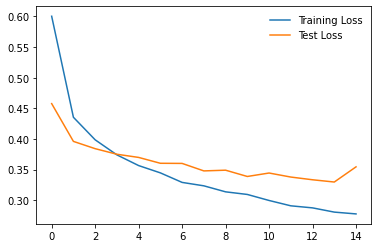

In [31]:
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend(frameon=False)

# IMporting Images

In [32]:
import torch 
from torch import nn, optim
from torchvision import datasets, transforms, models
import numpy as np
import pandas as pd

In [33]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-12-03 05:58:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   188MB/s    in 0.6s    

2021-12-03 05:58:18 (188 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [34]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# importing helper function
from helper_functions import create_tensorboard_callback, plot_loss_curves, pred_and_plot, unzip_data, walk_through_dir

--2021-12-03 05:58:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-03 05:58:18 (65.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [35]:
unzip_data('pizza_steak.zip')

In [36]:
train_transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = (0.485, 0.456, 0.406),
        std = (0.229, 0.224, 0.225),
    ),
])

test_transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

In [37]:
train_data_dir = '/content/pizza_steak/train'
test_data_dir = '/content/pizza_steak/test'

In [38]:
train_dataset = datasets.ImageFolder(train_data_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(test_data_dir, transform=test_transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [68]:
model = models.densenet121(pretrained=True)

In [69]:
# frezzing feature paramaters
for param in model.parameters():
  param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(1024, 526)),
    ('relu', nn.ReLU()),
    ('fc2', nn.Linear(526, 2)),
    ('output', nn.LogSoftmax(dim=1))
]))

model.classifier = classifier

In [70]:
# for cuda in [False, True]:

#   criterion = nn.NLLLoss()
#   optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

#   if cuda:
#     model.cuda()
#   else:
#     model.cpu()

#   for ii, (images, labels) in enumerate(train_dataloader):
#     images, labels = variables(images), variables(labels)

#     if cuda:
#       images, labels = images.cuda(), labels.cuda()
    

In [71]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [72]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [73]:
epochs = 15
step = 0

train_losses = []
test_losses = []

for epoch in range(epochs):
  running_loss = 0
  for images, labels in train_dataloader:
    step += 1

    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()

    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if (step % 5) == 0:
      test_loss = 0
      accuracy = 0

      model.eval()

      for images, labels in test_dataloader:
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.cuda.FloatTensor))

      train_losses.append(running_loss / len(train_dataloader))
      test_losses.append(test_loss / len(test_dataloader))

      model.train()

      print(f"Epoch: {epoch+1}")
      print(f"Training loss {(running_loss / len(train_dataloader))}")
      print(f"Test loss: {(test_loss / len(test_dataloader))}")
      print(f"Test Accuracy: {accuracy / len(test_dataloader)} \n")

RuntimeError: ignored